In [22]:
# Import Librariesfrom keras.models import Sequential
from keras.layers import Dense
import re
import warnings
from keras.models import load_model
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras import initializers
import keras
import numpy as np
import pandas as pd
import time
import cv2
import matplotlib.pyplot as plt
import os
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
from keras.models import load_model

In [46]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        #print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [47]:
images1=load_images_from_folder("preprocessed3/daisy")
images2=load_images_from_folder("preprocessed3/dandelion")
images3=load_images_from_folder("preprocessed3/rose")
images4=load_images_from_folder("preprocessed3/sunflower")
images5=load_images_from_folder("preprocessed3/tulip")

In [48]:
images1=np.asarray(images1)
images2=np.asarray(images2)
images3=np.asarray(images3)
images4=np.asarray(images4)
images5=np.asarray(images5)

In [49]:
images1[5].shape

(150, 150, 3)

In [50]:
images=np.concatenate((images1,images2,images3,images4,images5),axis=0)

In [51]:
images=images/255

In [52]:
# for i in range(len(images5)):
#     images5[i]=cv2.resize(images5[i], (150, 150)) 
#     #gray = cv2.cvtColor(images5[i], cv2.COLOR_BGR2GRAY)
#     cv2.imwrite(f"preprocessed3/tulip/{i}.jpg", images5[i])

In [53]:
images

array([[[[0.51372549, 0.53333333, 0.52941176],
         [0.55294118, 0.57254902, 0.56862745],
         [0.56862745, 0.56862745, 0.56862745],
         ...,
         [0.6       , 0.60392157, 0.59607843],
         [0.6       , 0.6       , 0.6       ],
         [0.59607843, 0.59607843, 0.59607843]],

        [[0.50980392, 0.52941176, 0.5254902 ],
         [0.54901961, 0.56862745, 0.56470588],
         [0.55686275, 0.56470588, 0.56470588],
         ...,
         [0.6       , 0.60392157, 0.59607843],
         [0.60392157, 0.60392157, 0.60392157],
         [0.58431373, 0.58431373, 0.58431373]],

        [[0.50588235, 0.52941176, 0.5254902 ],
         [0.54901961, 0.56862745, 0.56470588],
         [0.55686275, 0.56470588, 0.56470588],
         ...,
         [0.60392157, 0.60392157, 0.60392157],
         [0.59215686, 0.59215686, 0.59215686],
         [0.57647059, 0.57647059, 0.57647059]],

        ...,

        [[0.09803922, 0.18823529, 0.17254902],
         [0.09803922, 0.18823529, 0.17254902]

In [54]:
y=np.zeros(len(images))
y[len(images1):]=1
y[len(images1)+len(images2):]=2
y[len(images1)+len(images2)+len(images3):]=3
y[len(images1)+len(images2)+len(images3)+len(images4):]=4

In [55]:
y[2782]

3.0

In [56]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y= np_utils.to_categorical(y)

In [57]:
images=np.expand_dims(images, axis=3) 

In [58]:
images.shape

(4323, 150, 150, 1, 3)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images, y, test_size=0.2, random_state=0)#train test random split

In [60]:
X_train.shape

(3458, 150, 150, 1, 3)

In [61]:
#filepath = "CNN-{epoch:02d}-{val_acc:.3f}"  # unique file name that will include the epoch and the validation acc for that epoch
#checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')) # saves only the best ones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization

model = Sequential()
model.add(Conv2D(16,(5,5), activation='relu',input_shape=(X_train[0].shape)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(32,(4,4),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(5))
model.add(Activation('softmax'))
for layer in model.layers:
    
    print(layer.output_shape)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



ValueError: Input 0 of layer conv2d_8 is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: [None, 150, 150, 1, 3]

In [40]:
history1=model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_split=0.2)

Train on 2766 samples, validate on 692 samples
Epoch 1/10
2766/2766 [==============================] - 103s 37ms/sample - loss: 1.5852 - acc: 0.2719 - val_loss: 1.5363 - val_acc: 0.3584
Epoch 2/10
2766/2766 [==============================] - 101s 37ms/sample - loss: 1.4844 - acc: 0.3547 - val_loss: 1.5495 - val_acc: 0.3223
Epoch 3/10
2766/2766 [==============================] - 103s 37ms/sample - loss: 1.4138 - acc: 0.4103 - val_loss: 1.4684 - val_acc: 0.3974
Epoch 4/10
2766/2766 [==============================] - 105s 38ms/sample - loss: 1.3005 - acc: 0.4704 - val_loss: 1.4795 - val_acc: 0.3367
Epoch 5/10
2766/2766 [==============================] - 101s 37ms/sample - loss: 1.2271 - acc: 0.5098 - val_loss: 1.3779 - val_acc: 0.4176
Epoch 6/10
2766/2766 [==============================] - 102s 37ms/sample - loss: 1.1272 - acc: 0.5568 - val_loss: 1.3617 - val_acc: 0.4523
Epoch 7/10
2766/2766 [==============================] - 101s 36ms/sample - loss: 1.0536 - acc: 0.5868 - val_loss: 1.335

In [ ]:
history2=model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_split=0.2)

In [ ]:
history3=model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_split=0.2)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
Y_test2=np.argmax(Y_test,axis=1)
Y_pred=model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
acc=accuracy_score(Y_test2, y_pred)
print(acc)
print(confusion_matrix(Y_test2,y_pred))
print(classification_report(Y_test2,y_pred))

0.500578034682081
[[ 38  55  24  22  23]
 [  2 136  17  33  18]
 [  2  23  65  29  33]
 [  1  14  21  86  25]
 [  2  18  34  36 108]]
              precision    recall  f1-score   support

           0       0.84      0.23      0.37       162
           1       0.55      0.66      0.60       206
           2       0.40      0.43      0.42       152
           3       0.42      0.59      0.49       147
           4       0.52      0.55      0.53       198

    accuracy                           0.50       865
   macro avg       0.55      0.49      0.48       865
weighted avg       0.55      0.50      0.49       865



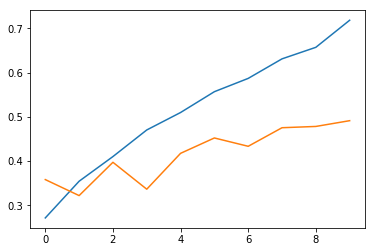

In [44]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history_gray.history_gray['acc'])
plt.plot(history_gray.history_gray['val_acc'])
